<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

### 1. Load the boston housing data (provided)

In [2]:
# Download the data and save to a file called "housing.data."
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import urllib
import numpy as np
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# this saves a file called 'housing.data' locally'
#urllib.urlretrieve(data_url, 'housing.data')

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for your convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [3]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

### 2. Load the `housing.data` file with python

Using any method of your choice.

> _**Hint:** despite this file having a strange `.data` extension, using python's `open() as file` and `file.read()` or `file.readlines()` we can load this in and see that it is a text file formatted much the same as a CSV. You can use string operations to format the data._

In [4]:
# A:
import csv
csv_rows = []
with open('housing.data', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
f.close()

In [5]:
data = []
for i in range(0,len(csv_rows)):
    data.append(csv_rows[i][0].split())

In [6]:
df = pd.DataFrame(data, columns=names)

In [7]:
df = df.applymap(float)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [9]:
# A:

In [113]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
430,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64,14.5
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90,17.4
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22,21.4
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72,24.2
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,19.0
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,14.9
431,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
168,2.30040,0.0,19.58,0.0,0.605,6.319,96.1,2.1000,5.0,403.0,14.7,297.09,11.10,23.8
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09,17.4


In [103]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [105]:
#Summary stats
round(df.describe(),0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,0.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,357.0,13.0,23.0
std,9.0,23.0,7.0,0.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,91.0,7.0,9.0
min,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,0.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,375.0,7.0,17.0
50%,0.0,0.0,10.0,0.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,391.0,11.0,21.0
75%,4.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,17.0,25.0
max,89.0,100.0,28.0,1.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,397.0,38.0,50.0


In [107]:
#no nulls
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [114]:
#count zeros
df.isin([0]).sum()

CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

In [112]:
#no duplicates
df.duplicated().sum()

0

### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?

Nox because it is binary
Potentially ZN and CRIM because there is a high volume of zeros

### 5. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

In [151]:
# A: RAD & TAX

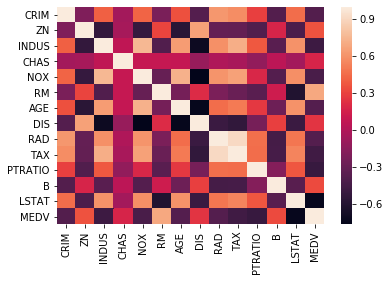

In [150]:
sns.heatmap(df.corr())

In [148]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [149]:
corr = df.corr()

for index, series in corr.iterrows():
    print(f'{series.name}: {series.nlargest(2)[1]}')
    

CRIM: 0.6255051452626011
ZN: 0.6644082227621132
INDUS: 0.7636514469209145
CHAS: 0.1752601771902975
NOX: 0.7636514469209145
RM: 0.6953599470715389
AGE: 0.7314701037859579
DIS: 0.6644082227621132
RAD: 0.9102281885331822
TAX: 0.9102281885331822
PTRATIO: 0.46474117850305435
B: 0.33346081965706653
LSTAT: 0.6037997164766213
MEDV: 0.6953599470715389


### 6. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

# A: 
1. RM is the least skewed because it has a low skew and look the most normal. INDUS has a lower skew, but the distribution looks more or a binomial than normal. 
2. B is teh most left skewed. It could also be CRIM, but i think becuase of it's large amount of zeros, there's probably someting going on with the data making juding it on skewness not fair
3. CRIM or DIS is the most right skewed

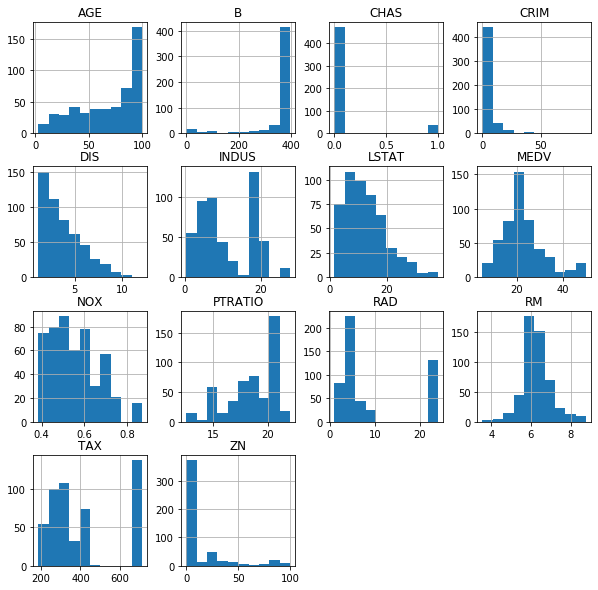

In [165]:
df.hist(figsize=(10,10));

In [162]:
df.skew().sort_index()

AGE       -0.598963
B         -2.890374
CHAS       3.405904
CRIM       5.223149
DIS        1.011781
INDUS      0.295022
LSTAT      0.906460
MEDV       1.108098
NOX        0.729308
PTRATIO   -0.802325
RAD        1.004815
RM         0.403612
TAX        0.669956
ZN         2.225666
dtype: float64

### 8. Repeat question 6 but scale the variables by their range first.

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

In [8]:
# A:

### 9. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

In [224]:
# A:
round(df[['MEDV','CHAS','TAX','RAD']].describe(),0)

,MEDV,CHAS,TAX,RAD
count,506.0,506.0,506.0,506.0
mean,23.0,0.0,408.0,10.0
std,9.0,0.0,169.0,9.0
min,5.0,0.0,187.0,1.0
25%,17.0,0.0,279.0,4.0
50%,21.0,0.0,330.0,5.0
75%,25.0,0.0,666.0,24.0
max,50.0,1.0,711.0,24.0


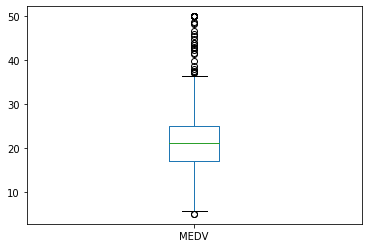

In [186]:
df.MEDV.plot.box();

In [230]:
list(enumerate(df[['MEDV','CHAS','TAX','RAD']]))

[(0, 'MEDV'), (1, 'CHAS'), (2, 'TAX'), (3, 'RAD')]

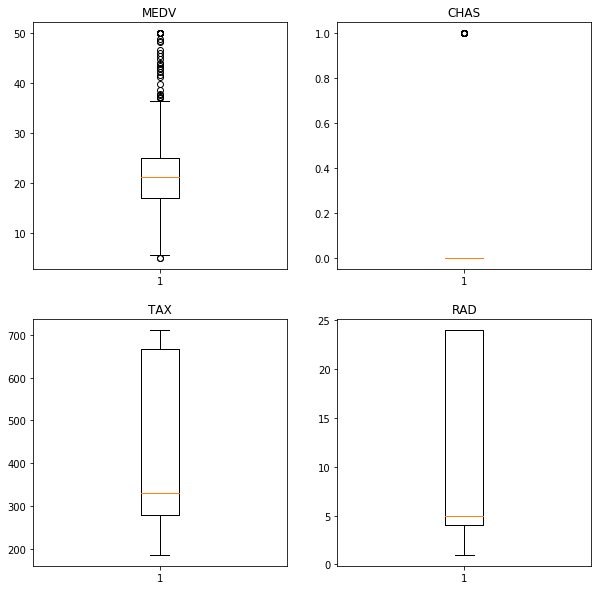

In [228]:
plt.figure(figsize=(10,10))

for i, col in enumerate(df[['MEDV','CHAS','TAX','RAD']]):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[col])
    plt.title(col)

### 10. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

# A: 
Descriptive

Descriptive = describing current data
Inferential = trying to make prediections about a population based on current/sample data


### 11. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**11.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [10]:
# A:
import random

df.AGE.sample(n=50)

52      21.1
394     94.7
113     95.4
446     96.4
284     20.8
184     89.8
342     59.7
182     92.2
77      45.8
14      84.5
460     90.0
442    100.0
179     58.4
235     61.5
213     32.3
141    100.0
171     97.3
193      9.9
1       78.9
354     21.9
33      95.0
436     93.3
479     88.0
403     96.0
444     96.6
150     97.3
230     68.1
103     87.4
88      86.3
504     89.3
164     91.8
318     67.2
50      45.7
155     82.6
350     44.4
471     90.7
147     95.7
293     18.4
400    100.0
180     83.3
34      96.9
178     74.4
222     77.7
157     97.4
396     96.0
39      21.8
233     70.4
500     79.7
51      63.0
386    100.0
Name: AGE, dtype: float64

**11.B Identify the type of sampling we just used.**

In [12]:
# A: Random Sampling

### 12. [BONUS] Of the remaining types of sampling, describe (but do not execute) how you might implement at least one of these types of sampling.


In [13]:
# A: